 
 ## <font color="1497d4">  **Statistical Analysis for Accented Speech recognition**</font>

 
 
<font color=white> **Mozilla Common Voice 10.0. dataset**</font> 

## <font color="1497d4">  **Analyze results from Carlos’ model**</font>
 
<font color=white> **Setup dev environment:**</font> 


 


###<font color="1497d4"> Import the necessary python libraries:</font>


The next step is to import the required python libraries:
*   NumPy:   for scientific computing.
*   Matplotlib: a plotting library for Python.
*   Matplotlib.pyplot:  a group of functions that allow matplotlib to work like MATLAB.
*   Pandas: used for data science/data analysis.







In [28]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import math Library   -- # Check whether some values are NaN
import math

###<font color="1497d4"> Importing the Dataset:</font>


The next step is to import the dataset file by either uploading the file on Google Colab or mounting the google drive and empowering Colab to access all files(dataset)on it. Then to copy the dataset to our colab runtime files.

In [29]:
#Mount drive


In [30]:
# Import the dataset file by method1 
# from google.colab import files
# uploaded = files.upload()

! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/results.json   /content/results.json

# copy the expermintations files to deal with them
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_at.txt /content/test_at.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ca.txt /content/test_ca.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ch.txt /content/test_ch.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de_al.txt /content/test_de_al.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de_ni.txt /content/test_de_ni.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de.txt /content/test_de.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_fr.txt /content/test_fr.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_gb.txt /content/test_gb.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_it.txt /content/test_it.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ru.txt /content/test_ru.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_us.txt /content/test_us.txt

# copy the expermintations files from Mozilla Commen Voice v 10 to deal with them

! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/cv-corpus04072022/de/validated.tsv /content/validated.tsv


###<font color="1497d4"> Reading the Dataset:</font>
**The following Method takes the dataset filename and loads it into data frame called dataset.**




In [31]:
#read a TSV file/Dataset

import pandas as pd
dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t')
dataset_validated_tsv

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
0,0052c07533a6976233ad5926d950b523002c4d8cdd9ae8...,common_voice_de_17922420.mp3,Zieht euch bitte draußen die Schuhe aus.,2,0,NaN,NaN,NaN,de,NaN
1,00aa59ff387a07bf1c056cccd6715b3c764201f51092c3...,common_voice_de_27060918.mp3,Es gibt auch mehrere Campingplätze.,2,0,NaN,NaN,NaN,de,NaN
2,02274179aeff73e1e7897ed6fec2355af2cd6e5410e3c6...,common_voice_de_19728810.mp3,Es kommt zum Showdown in Gstaad.,2,1,NaN,NaN,NaN,de,NaN
3,02650022b4a4266846057d97ae4d81da8af9e09e2a4bb1...,common_voice_de_19156087.mp3,Ihre Fotostrecken erschienen in Modemagazinen ...,3,1,NaN,NaN,NaN,de,NaN
4,02786062ec85038ffeed4c38ed7b31d3aa8e6439817fb1...,common_voice_de_27395829.mp3,"Aber weißt du, wer den Stein wirklich ins Roll...",2,0,NaN,NaN,NaN,de,NaN
...,...,...,...,...,...,...,...,...,...,...
793063,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911655.mp3,Gegen Bezahlung posierte sie für Fotos und gab...,3,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN
793064,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911638.mp3,Zur Folgesaison wechselte er fest in die Niede...,6,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN
793065,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911641.mp3,Er ist auf die Stile Schmetterling und Lagen s...,3,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN
793066,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911661.mp3,Vieles wurde exportiert.,6,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN


###<font color="1497d4">The descriptive statistics and computational methods discussed in the data structure overview are all written to account for missing data. </font>
**For example:**
*   When countming data, NA (missing) values will be treated as zero.
*   If the data are all NA, the result will be 0.
*   Cumulative methods like cumcount() and cumprod() ignore NA values by default, but preserve them in the resulting arrays. To override this behaviour and include NA values, use skipna=False.

http://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#experimental-na-scalar-to-denote-missing-values

###<font color="1497d4"> Cleaning our dataset</font>

We have 49230  rows in our dataset. Consequently, we will delete the rows which do not meet the conditions (Values range). otherwise it changed normaly with the mean of the field in the small dataset.
After deleting the rows which have missing data. We relize that the new number 4495 rows. 

###<font color="1497d4"> **You can find the test data, split by accent, in the data zip. The results are also within that zip file, named results.json. Here are some numbers and plots that we would like to have.**</font>

1.   **Duration distribution of audiofiles per speaker's accent, gender and age group, both as a plot and in terms of mean and variance.**
2.   **WER distribution per speaker's accent, gender, age group 
and duration, both as a plot and in terms of mean and variance.**
 


#### **Duration distribution of audiofiles per speaker's accent ,both as a plot and in terms of mean and variance.**

In [34]:
#################################Extract and calculate the duration_numeric########################################
# add Columns Names to the Dataset: header=None, names=['audio_filepath','text','duration']
dataset_test_at = pd.read_csv('test_at.txt', header=None, names=['audio_filepath','text','duration'])
'''
df['Numbers Only'] = df['Numbers and Text'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
'''
# extract the numeric values of the durations from the third Column and store it in a new column called
dataset_test_at['duration_numeric'] = dataset_test_at['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_at['duration_numeric'] =dataset_test_at['duration_numeric'].div(10)
# extract the numeric values of the durations from the third Column and store it in a new column called 
#dataset_test_at['audio_filepath_numeric'] = dataset_test_at['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_at['audio_filepath_numeric'] = dataset_test_at['audio_filepath'].str[-13:-5]

###dataset_test_at['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
dataset_test_at


,audio_filepath,text,duration,duration_numeric,audio_filepath_numeric
0,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er ist nach eustache de saint pierre...","""duration"": 4.9}",4.9,31449916
1,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""eine erste kleinformatige vorstudie ...","""duration"": 10.1}",10.1,19730674
2,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er blieb ohne erfolg und lag in st\u...","""duration"": 9.0}",9.0,19703888
3,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""mein garten ist teil eines kleingart...","""duration"": 3.7}",3.7,18507972
4,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""was habe ich damals f\u00fcr einen u...","""duration"": 3.6}",3.6,24131267
...,...,...,...,...,...
4490,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""es handelt sich heute um eine wohnst...","""duration"": 5.8}",5.8,23706817
4491,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""wir m\u00fcssen sie blo\u00df verbes...","""duration"": 4.2}",4.2,21599214
4492,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""unter abspaltung von wasser bildet s...","""duration"": 6.8}",6.8,25132532
4493,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""die sammlung wurde von gro\u00dfherz...","""duration"": 5.6}",5.6,23778312


#### **Duration distribution of audiofiles per speaker's accent AT,CA, CH, DE_AL, DE_ni, DE, FR, GB, IT, RU, US. both as a plot and in terms of mean and variance.**

In [35]:
# copy the expermintations files to deal with them
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_at.txt /content/test_at.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ca.txt /content/test_ca.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ch.txt /content/test_ch.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de_al.txt /content/test_de_al.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de_ni.txt /content/test_de_ni.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de.txt /content/test_de.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_fr.txt /content/test_fr.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_gb.txt /content/test_gb.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_it.txt /content/test_it.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ru.txt /content/test_ru.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_us.txt /content/test_us.txt


In [36]:
# Duration distribution of audiofiles per speaker's accent AT,CA, CH, DE_AL, DE_ni, DE, FR, GB, IT, RU, US. both as a plot and in terms of mean and variance.
import re # import the library of research about special value in String 
################################## Accent AT ###########################################
print('################################## Accent AT ###########################################')
# add Columns Names to the Dataset: header=None, names=['audio_filepath','text','duration']
dataset_test_at = pd.read_csv('test_at.txt', header=None, names=['audio_filepath','text','duration'])

'''
df['Numbers Only'] = df['Numbers and Text'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
'''

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_at['duration_numeric'] = dataset_test_at['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_at['duration_numeric'] =dataset_test_at['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_at['audio_filepath_numeric'] = dataset_test_at['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_at['audio_filepath_numeric'] = dataset_test_at['audio_filepath'].str[-13:-5]

##dataset_test_at['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_at)
################################### Accent CA ##########################################
print('################################## Accent CA ###########################################')
dataset_test_ca = pd.read_csv('test_ca.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_ca['duration_numeric'] = dataset_test_ca['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_ca['duration_numeric'] =dataset_test_ca['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_ca['audio_filepath_numeric'] = dataset_test_ca['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_ca['audio_filepath_numeric'] = dataset_test_ca['audio_filepath'].str[-13:-5]

print(dataset_test_ca)
##################################### Accent CH ########################################
print('################################## Accent CH ###########################################')
dataset_test_ch = pd.read_csv('test_ch.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_ch['duration_numeric'] = dataset_test_ch['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_ch['duration_numeric'] =dataset_test_ch['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_ch['audio_filepath_numeric'] = dataset_test_ch['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_ch['audio_filepath_numeric'] = dataset_test_ch['audio_filepath'].str[-13:-5]

print(dataset_test_ch)
##################################### Accent DE_AL ########################################
print('################################## Accent DE_AL ###########################################')
dataset_test_de_al = pd.read_csv('test_de_al.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_de_al['duration_numeric'] = dataset_test_de_al['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_de_al['duration_numeric'] =dataset_test_de_al['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_de_al['audio_filepath_numeric'] = dataset_test_de_al['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_de_al['audio_filepath_numeric'] = dataset_test_de_al['audio_filepath'].str[-13:-5]

print(dataset_test_de_al)
##################################### Accent DE_NI ########################################
print('################################## Accent DE_NI ###########################################')
dataset_test_de_ni = pd.read_csv('test_de_ni.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_de_ni['duration_numeric'] = dataset_test_de_ni['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_de_ni['duration_numeric'] =dataset_test_de_ni['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_de_ni['audio_filepath_numeric'] = dataset_test_de_ni['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_de_ni['audio_filepath_numeric'] = dataset_test_de_ni['audio_filepath'].str[-13:-5]

###dataset_test_de_ni['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_de_ni)
##################################### Accent DE ########################################
print('################################## Accent DE ###########################################')
dataset_test_de = pd.read_csv('test_de.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_de['duration_numeric'] = dataset_test_de['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_de['duration_numeric'] =dataset_test_de['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_de['audio_filepath_numeric'] = dataset_test_de['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_de['audio_filepath_numeric'] = dataset_test_de['audio_filepath'].str[-13:-5]

###dataset_test_de['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_de)
##################################### Accent FR ########################################
print('################################## Accent FR ###########################################')
dataset_test_fr = pd.read_csv('test_fr.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_fr['duration_numeric'] = dataset_test_fr['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_fr['duration_numeric'] =dataset_test_fr['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_fr['audio_filepath_numeric'] = dataset_test_fr['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_fr['audio_filepath_numeric'] = dataset_test_fr['audio_filepath'].str[-13:-5]

###dataset_test_fr['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_fr)
##################################### Accent GB ########################################
print('################################## Accent GB ###########################################')
dataset_test_gb = pd.read_csv('test_gb.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_gb['duration_numeric'] = dataset_test_gb['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_gb['duration_numeric'] =dataset_test_gb['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_gb['audio_filepath_numeric'] = dataset_test_gb['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_gb['audio_filepath_numeric'] = dataset_test_gb['audio_filepath'].str[-13:-5]

###dataset_test_gb['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_gb)
##################################### Accent IT ########################################
print('################################## Accent IT ###########################################')
dataset_test_it = pd.read_csv('test_it.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_it['duration_numeric'] = dataset_test_it['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_it['duration_numeric'] =dataset_test_it['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_it['audio_filepath_numeric'] = dataset_test_it['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_it['audio_filepath_numeric'] = dataset_test_it['audio_filepath'].str[-13:-5]

###dataset_test_it['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_it)
##################################### Accent RU ########################################
print('################################## Accent RU ###########################################')
dataset_test_ru = pd.read_csv('test_ru.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_ru['duration_numeric'] = dataset_test_ru['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_ru['duration_numeric'] =dataset_test_ru['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_ru['audio_filepath_numeric'] = dataset_test_ru['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_ru['audio_filepath_numeric'] = dataset_test_ru['audio_filepath'].str[-13:-5]

###dataset_test_ru['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_ru)
##################################### Accent US ########################################
print('################################## Accent US ###########################################')
dataset_test_us = pd.read_csv('test_us.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_us['duration_numeric'] = dataset_test_us['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_us['duration_numeric'] =dataset_test_us['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_us['audio_filepath_numeric'] = dataset_test_us['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_us['audio_filepath_numeric'] = dataset_test_us['audio_filepath'].str[-13:-5]

###dataset_test_us['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_us)

##################################### Accent Mean ########################################

print('################################## Accent Mean ###########################################')
dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us']
dataset_name="dataset_test_"

for i in range(len(dataset_test_)):
  Accent_Values=dataset_test_[i]
  #print('dataset_test_'+Accent_Values+' mean =',Accent_Values)
  
  Accent_type=dataset_name+Accent_Values
  print(f'{Accent_type}_mean =',Accent_type)
print('################################## Accent Mean ###########################################')

print(np.mean(dataset_test_at['duration_numeric']))
print(np.mean(dataset_test_ca['duration_numeric']))
print(np.mean(dataset_test_ch['duration_numeric']))
print(np.mean(dataset_test_de_al['duration_numeric']))
print(np.mean(dataset_test_de_ni['duration_numeric']))
print(np.mean(dataset_test_de['duration_numeric']))
print(np.mean(dataset_test_fr['duration_numeric']))
print(np.mean(dataset_test_gb['duration_numeric']))
print(np.mean(dataset_test_it['duration_numeric']))
print(np.mean(dataset_test_ru['duration_numeric']))
print(np.mean(dataset_test_us['duration_numeric']))

# for i in range(1,12):
#   dataset_accent_all=[i]
#   print(i)

################################## Accent AT ###########################################
                                         audio_filepath  \
0     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
1     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
2     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
3     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
4     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
...                                                 ...   
4490  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
4491  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
4492  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
4493  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
4494  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   

                                                   text            duration  \
0      "text": "er ist nach eustache de saint pierre...    "duration": 4.9}   
1      "text": "eine erste kleinformatige vo

In [37]:
print('################################## Accent Mean ###########################################')
dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us']
dataset_test_[0]
for i in range(len(dataset_test_)):
  Accent_Values=dataset_test_[i]
  print('dataset_test_'+Accent_Values+' mean =',Accent_Values)
print('################################## Accent Mean ###########################################')


################################## Accent Mean ###########################################
dataset_test_at mean = at
dataset_test_ca mean = ca
dataset_test_ch mean = ch
dataset_test_de_al mean = de_al
dataset_test_de_ni mean = de_ni
dataset_test_de mean = de
dataset_test_fr mean = fr
dataset_test_gb mean = gb
dataset_test_it mean = it
dataset_test_ru mean = ru
dataset_test_us mean = us
################################## Accent Mean ###########################################


In [38]:
#   return np.mean(DatasetName)
 

print('################################## Accent Mean ###########################################')
list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us']
dataset_dataset_test_=pd.DataFrame(list_dataset_test_, columns=['accent']) 

dataset_name="dataset_test_"
dataset_column="['duration_numeric']"

dataset_all_accent=[] # create a dataset called "dataset_all_accent" required column of mean calculations of all Accents
list_all_accent_cal=[] # list of the results of mean calculations of all accents
list_all_accent=[]
list_all_accent_mean=[] # create a dataset called "list_all_accent_mean" contains the mean calculations of all Accents
for i in range(len(list_dataset_test_)):
  
  Accent_Values=dataset_test_[i]
  Accent_type=dataset_name+Accent_Values+dataset_column
  ###list_all_accent_cal.insert(i,5+i)
  #list_all_accent_cal[i]=np.mean(dataset_test_at['duration_numeric'])
  ###print(f' \'np.mean({Accent_type}\'),')
  temp_list=f' {Accent_type}'
  temp_mean_list=f' np.mean({Accent_type})'

  

  #list_all_accent_cal.insert(i,np.mean(temp_list))

  print(f'np.mean({Accent_type})')
  # create a dataset called "list_all_accent_mean" contains the mean calculations for all Accents
  ###dataset_all_accent.insert(i,Accent_type)
  list_all_accent.insert(i,temp_list)
  list_all_accent_mean.insert(i,temp_mean_list)
  
# print('#'*60,'dataset_all_accent')
# print(dataset_all_accent,'\n')

print('#'*30,'list_all_accent=','#'*30)
#print(f'{list_all_accent}',sep=os.linesep)
print(f' \n {list_all_accent}')


print('#'*30,'list_all_accent_mean=','#'*30)
#print(f'{list_all_accent_mean}',sep=os.linesep)
print(f'\n  {list_all_accent_mean}')

print('#'*30,'list_all_accent_cal=','#'*30)
print(f'\n  {list_all_accent_cal}')


 

 
# np.mean(dataset_test_at['duration_numeric'])

################################## Accent Mean ###########################################
np.mean(dataset_test_at['duration_numeric'])
np.mean(dataset_test_ca['duration_numeric'])
np.mean(dataset_test_ch['duration_numeric'])
np.mean(dataset_test_de_al['duration_numeric'])
np.mean(dataset_test_de_ni['duration_numeric'])
np.mean(dataset_test_de['duration_numeric'])
np.mean(dataset_test_fr['duration_numeric'])
np.mean(dataset_test_gb['duration_numeric'])
np.mean(dataset_test_it['duration_numeric'])
np.mean(dataset_test_ru['duration_numeric'])
np.mean(dataset_test_us['duration_numeric'])
############################## list_all_accent= ##############################
 
 [" dataset_test_at['duration_numeric']", " dataset_test_ca['duration_numeric']", " dataset_test_ch['duration_numeric']", " dataset_test_de_al['duration_numeric']", " dataset_test_de_ni['duration_numeric']", " dataset_test_de['duration_numeric']", " dataset_test_fr['duration_numeric']", " dataset_test_gb['duration_numeric']",

In [39]:
list_all_accent

[" dataset_test_at['duration_numeric']",
 " dataset_test_ca['duration_numeric']",
 " dataset_test_ch['duration_numeric']",
 " dataset_test_de_al['duration_numeric']",
 " dataset_test_de_ni['duration_numeric']",
 " dataset_test_de['duration_numeric']",
 " dataset_test_fr['duration_numeric']",
 " dataset_test_gb['duration_numeric']",
 " dataset_test_it['duration_numeric']",
 " dataset_test_ru['duration_numeric']",
 " dataset_test_us['duration_numeric']"]

In [40]:
list_all_accent_mean

[" np.mean(dataset_test_at['duration_numeric'])",
 " np.mean(dataset_test_ca['duration_numeric'])",
 " np.mean(dataset_test_ch['duration_numeric'])",
 " np.mean(dataset_test_de_al['duration_numeric'])",
 " np.mean(dataset_test_de_ni['duration_numeric'])",
 " np.mean(dataset_test_de['duration_numeric'])",
 " np.mean(dataset_test_fr['duration_numeric'])",
 " np.mean(dataset_test_gb['duration_numeric'])",
 " np.mean(dataset_test_it['duration_numeric'])",
 " np.mean(dataset_test_ru['duration_numeric'])",
 " np.mean(dataset_test_us['duration_numeric'])"]

In [41]:
dataset_all_accent= pd.DataFrame (list_all_accent, columns = ['accent'])
dataset_all_accent_mean = pd.DataFrame (list_all_accent_mean, columns = ['mean_of_accent'])
# dataset_all_accent_mean['Column'] = df['Column'].apply(ast.literal_eval)
dataset_all_accent_mean
# dataset_all_accent_mean.mean_of_all_accent[0]

,mean_of_accent
0,np.mean(dataset_test_at['duration_numeric'])
1,np.mean(dataset_test_ca['duration_numeric'])
2,np.mean(dataset_test_ch['duration_numeric'])
3,np.mean(dataset_test_de_al['duration_numeric'])
4,np.mean(dataset_test_de_ni['duration_numeric'])
5,np.mean(dataset_test_de['duration_numeric'])
6,np.mean(dataset_test_fr['duration_numeric'])
7,np.mean(dataset_test_gb['duration_numeric'])
8,np.mean(dataset_test_it['duration_numeric'])
9,np.mean(dataset_test_ru['duration_numeric'])


In [42]:
dataset_all_accent_mean.mean_of_accent[10]

" np.mean(dataset_test_us['duration_numeric'])"

In [43]:
####################################Insert Accent Loop##################################################
#######this output will written in an external py file called dataset_accent.py ########################
############## To implement it here in colab and get the mean of all accent ############################

list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us','stop']
list1=['']
Accent_=0
print('#'*60,'Insert Accent Loop','#'*60)
for j in list_dataset_test_:
  for i in range(0,11):
    #print(i)
    # print(onetime)
    if j!='stop':
      #print(f'Accent_{j}={dataset_all_accent_mean.mean_of_all_accent[i]}')
      print(f"\n print(' Accent_{j}_Duration_mean= ')")
      print(f"\n print({dataset_all_accent_mean.mean_of_accent[i]})")
      stopcal=i+1
      j=list_dataset_test_[stopcal]
  if j=='stop':
    break
  print('#'*60,{j},{i},'#'*60)

  

############################################################ Insert Accent Loop ############################################################

 print(' Accent_at_Duration_mean= ')

 print( np.mean(dataset_test_at['duration_numeric']))

 print(' Accent_ca_Duration_mean= ')

 print( np.mean(dataset_test_ca['duration_numeric']))

 print(' Accent_ch_Duration_mean= ')

 print( np.mean(dataset_test_ch['duration_numeric']))

 print(' Accent_de_al_Duration_mean= ')

 print( np.mean(dataset_test_de_al['duration_numeric']))

 print(' Accent_de_ni_Duration_mean= ')

 print( np.mean(dataset_test_de_ni['duration_numeric']))

 print(' Accent_de_Duration_mean= ')

 print( np.mean(dataset_test_de['duration_numeric']))

 print(' Accent_fr_Duration_mean= ')

 print( np.mean(dataset_test_fr['duration_numeric']))

 print(' Accent_gb_Duration_mean= ')

 print( np.mean(dataset_test_gb['duration_numeric']))

 print(' Accent_it_Duration_mean= ')

 print( np.mean(dataset_test_it['duration_numeric']))

 print(' 

In [44]:
import os
# remove the script if exists 
# os.remove("dataset_accent.py")
# open script to write in the calculation of Mean of all accent
dataset_accent_write_file = open("dataset_accent.py",'w')
dataset_accent_write_file.write("np.mean(dataset_test_at['duration_numeric'])")
dataset_accent_write_file.close()

In [45]:
import os
! cp /content/test_us.txt
# read the script
Read_dataset_file=open("dataset_accent.py",'r')
print(Read_dataset_file.read())

cp: missing destination file operand after '/content/test_us.txt'
Try 'cp --help' for more information.
np.mean(dataset_test_at['duration_numeric'])


#### Run the fiel dataset_accent.py 

In [46]:
# implement the script dataset_accent.py t ocalculate all the means and store them in a new dataset 
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/dataset_accent.py   /content/dataset_accent.py

exec(open("dataset_accent.py").read())

 Accent_at_Duration_mean= 
5.1273192436040045
 Accent_ca_Duration_mean= 
5.942276422764228
 Accent_ch_Duration_mean= 
5.504779917469051
 Accent_de_al_Duration_mean= 
5.370441988950277
 Accent_de_ni_Duration_mean= 
5.6436661698956785
 Accent_de_Duration_mean= 
4.842688472496165
 Accent_fr_Duration_mean= 
5.236254416961131
 Accent_gb_Duration_mean= 
5.5195945945945954
 Accent_it_Duration_mean= 
5.891308793456033
 Accent_ru_Duration_mean= 
4.192086330935251
 Accent_us_Duration_mean= 
5.838144329896908


In [47]:
# # add to the script
# datei = open("test3.py",'a')
# datei.write("\n np.mean(dataset_test_ca['duration_numeric'])")
# datei.close()

In [48]:
##############  store the mean results of all Accent in a dataframep##################################################
########################this output will written to a list and dataframe #############################################
import pandas as pd 
dataset_accent_all_Duration_mean_result=pd.DataFrame({'accent_type':['Accent_at_Duration_mean=', 'Accnt_ca_Duration_mean=' ,'Accnt_ch_Duration_mean=' , 'Accnt_de_al_Duration_mean=' , 'Accnt_de_ni_Duration_mean=' ,
                                                     'Accnt_de_Duration_mean=' ,'Accnt_fr_Duration_mean=' , 'Accnt_gb_Duration_mean=' , 'Accnt_it_Duration_mean=' , 'Accnt_ru_Duration_mean=' , 'Accnt_us_Duration_mean=' ] ,
                                      'accent_Duration_mean':[5.1273192436040045,5.942276422764228,5.504779917469051,5.370441988950277,5.6436661698956785,4.842688472496165,
                                            5.236254416961131,5.5195945945945954,5.891308793456033,4.192086330935251,5.838144329896908]    })


  
 
print('#'*60,'dataset_accent_all_Duration_mean_result','#'*60)
print(dataset_accent_all_Duration_mean_result)
print('#'*120)
# list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us','stop']
# list1=['']
# Accent_=0

# list_accent_all_mean_result=[]
# dataset_all_accent_mean=[]
# print('#'*60,'Insert Accent Loop','#'*60)
# for j in list_dataset_test_:
#   for i in range(0,11):
#     #print(i)
#     # print(onetime)
#     if j!='stop':
#       #print(f'Accent_{j}={dataset_all_accent_mean.mean_of_all_accent[i]}')
#       print(f"\n print(' Accent_{j}= ')")
#       print(f"\n print({dataset_all_accent_mean.mean_of_all_accent[i]})")
#       stopcal=i+1
#       j=list_dataset_test_[stopcal]
#       ####list_accent_all_mean_result[i]=dataset_all_accent_mean.mean_of_all_accent[i]
#   if j=='stop':
#     break
#   print('#'*60,{j},{i},'#'*60)

# dataset_accent_all_mean_result=pd.DataFrame(list_accent_all_mean_result,columns=[''])
# print('#'*60,'dataset_accent_all_mean_result','#'*60)

############################################################ dataset_accent_all_Duration_mean_result ############################################################
                   accent_type  accent_Duration_mean
0     Accent_at_Duration_mean=              5.127319
1      Accnt_ca_Duration_mean=              5.942276
2      Accnt_ch_Duration_mean=              5.504780
3   Accnt_de_al_Duration_mean=              5.370442
4   Accnt_de_ni_Duration_mean=              5.643666
5      Accnt_de_Duration_mean=              4.842688
6      Accnt_fr_Duration_mean=              5.236254
7      Accnt_gb_Duration_mean=              5.519595
8      Accnt_it_Duration_mean=              5.891309
9      Accnt_ru_Duration_mean=              4.192086
10     Accnt_us_Duration_mean=              5.838144
########################################################################################################################


In [49]:
# add the accent_Duration_mean column to the dataset_test_at
dataset_test_at['accent_Duration_mean'] = np.where(dataset_test_at['audio_filepath']!=np.NaN,5.127319, '000')
dataset_test_at

,audio_filepath,text,duration,duration_numeric,audio_filepath_numeric,accent_Duration_mean
0,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er ist nach eustache de saint pierre...","""duration"": 4.9}",4.9,31449916,5.127319
1,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""eine erste kleinformatige vorstudie ...","""duration"": 10.1}",10.1,19730674,5.127319
2,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er blieb ohne erfolg und lag in st\u...","""duration"": 9.0}",9.0,19703888,5.127319
3,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""mein garten ist teil eines kleingart...","""duration"": 3.7}",3.7,18507972,5.127319
4,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""was habe ich damals f\u00fcr einen u...","""duration"": 3.6}",3.6,24131267,5.127319
...,...,...,...,...,...,...
4490,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""es handelt sich heute um eine wohnst...","""duration"": 5.8}",5.8,23706817,5.127319
4491,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""wir m\u00fcssen sie blo\u00df verbes...","""duration"": 4.2}",4.2,21599214,5.127319
4492,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""unter abspaltung von wasser bildet s...","""duration"": 6.8}",6.8,25132532,5.127319
4493,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""die sammlung wurde von gro\u00dfherz...","""duration"": 5.6}",5.6,23778312,5.127319


In [50]:
# change dataset_test_at['audio_filepath_numeric'] from object to numeric
dataset_test_at['audio_filepath_numeric'] = pd.to_numeric(dataset_test_at['audio_filepath_numeric'])
dataset_test_at.dtypes

audio_filepath             object
text                       object
duration                   object
duration_numeric          float64
audio_filepath_numeric      int64
accent_Duration_mean       object
dtype: object

In [51]:
dataset_accent_all_Duration_mean_result

,accent_type,accent_Duration_mean
0,Accent_at_Duration_mean=,5.127319
1,Accnt_ca_Duration_mean=,5.942276
2,Accnt_ch_Duration_mean=,5.504780
3,Accnt_de_al_Duration_mean=,5.370442
4,Accnt_de_ni_Duration_mean=,5.643666
5,Accnt_de_Duration_mean=,4.842688
6,Accnt_fr_Duration_mean=,5.236254
7,Accnt_gb_Duration_mean=,5.519595
8,Accnt_it_Duration_mean=,5.891309
9,Accnt_ru_Duration_mean=,4.192086


###**<font color="1497d4">Bar charts Duration's Accent  </font>**


####**<font color="1497d4">Bar chart: </font>** **x='accent', y = 'accent_Duration_mean'**

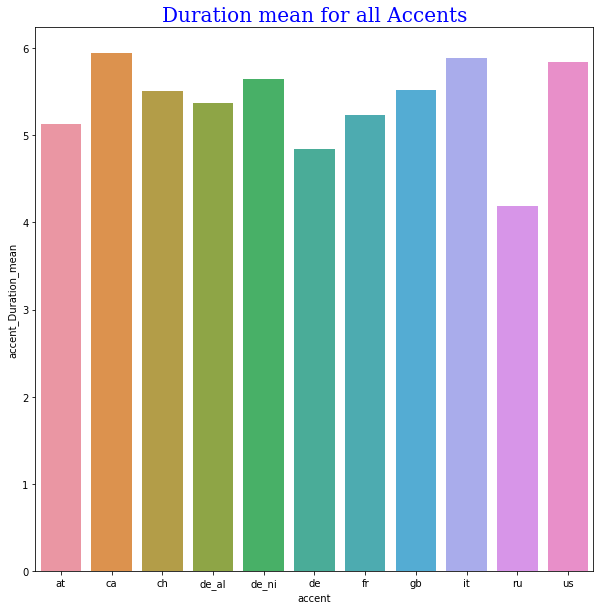

In [52]:
#plt.subplot(2,3,1)
#fig, axs = plt.subplots(2, 2, figsize=(15, 15))
#plt.legend()

# list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us','stop']
# list1=['']
# Accent_=0
# print('#'*60,'Insert Accent Loop','#'*60)
# for j in list_dataset_test_:
#   for i in range(0,11):
#     #print(i)
#     # print(onetime)
#     if j!='stop':
#       #print(f'Accent_{j}={dataset_all_accent_mean.mean_of_all_accent[i]}')
#       print(f"\n print(' Accent_{j}_Duration_mean= ')")
#       print(f"\n print({dataset_all_accent_mean.mean_of_all_accent[i]})")
#       stopcal=i+1
#       j=list_dataset_test_[stopcal]
#   if j=='stop':
#     break
#   print('#'*60,{j},{i},'#'*60)
# To show only the Accent letters ,we add neu column called accent in dataset_accent_all_Duration_mean_result
list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us','stop']
list_dataset_test_accent=['Österreichisches Deutsch','Kanadisches Deutsch','Schweizerdeutsch','Alemannische Färbung,Schweizer Standart Deutsch','Niederländisch Deutsch',' Deutschland Deutsch','Französisch Deutsch	','Britisches Deutsch',' Italienisch Deutsch'
,'Russisch Deutsch','Amerikanisches Deutsch']


dataset_accent_all_Duration_mean_result['accent']=dataset_dataset_test_['accent']
import seaborn as sns
from matplotlib import pyplot as plt


################################## Accent AT ###########################################
# position of the figure and figure;s size 
figure_duriation_distribution_accent=plt.figure(12,figsize=(10,10))  
#plt.subplots(figure's number per column,figure's number per row)
####>>>>>ax_duriation_distribution_accent_at=figure_duriation_distribution_accent.add_subplot(3,4,1)

# for i in range(len(dataset_accent_all_Duration_mean_result)):
dataset_test_at['accent_Duration_mean'] = np.where(dataset_test_at['audio_filepath']!=np.NaN,5.127319, '000')

# plt.xlabel("Speaker's accent - Austria")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_at['accent_Duration_mean'],dataset_test_at['audio_filepath_numeric'], lw=3, ms=20)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title('Duration mean for all Accents',fontdict  = font1)


ax = sns.barplot(x = 'accent', y = 'accent_Duration_mean', data = dataset_accent_all_Duration_mean_result)
plt.savefig('plotBarDiagrams_Accent_Duration.png')


####**<font color="1497d4">Bar chart: All Accent -Gender</font>** **x='accent', y = 'accent_Duration_mean' according to gender Accent ='all Accent'**

################################## Bar chart: x='accent', y = 'accent_Duration_mean' according to the gender - Accent ='all Accent' ###########################################


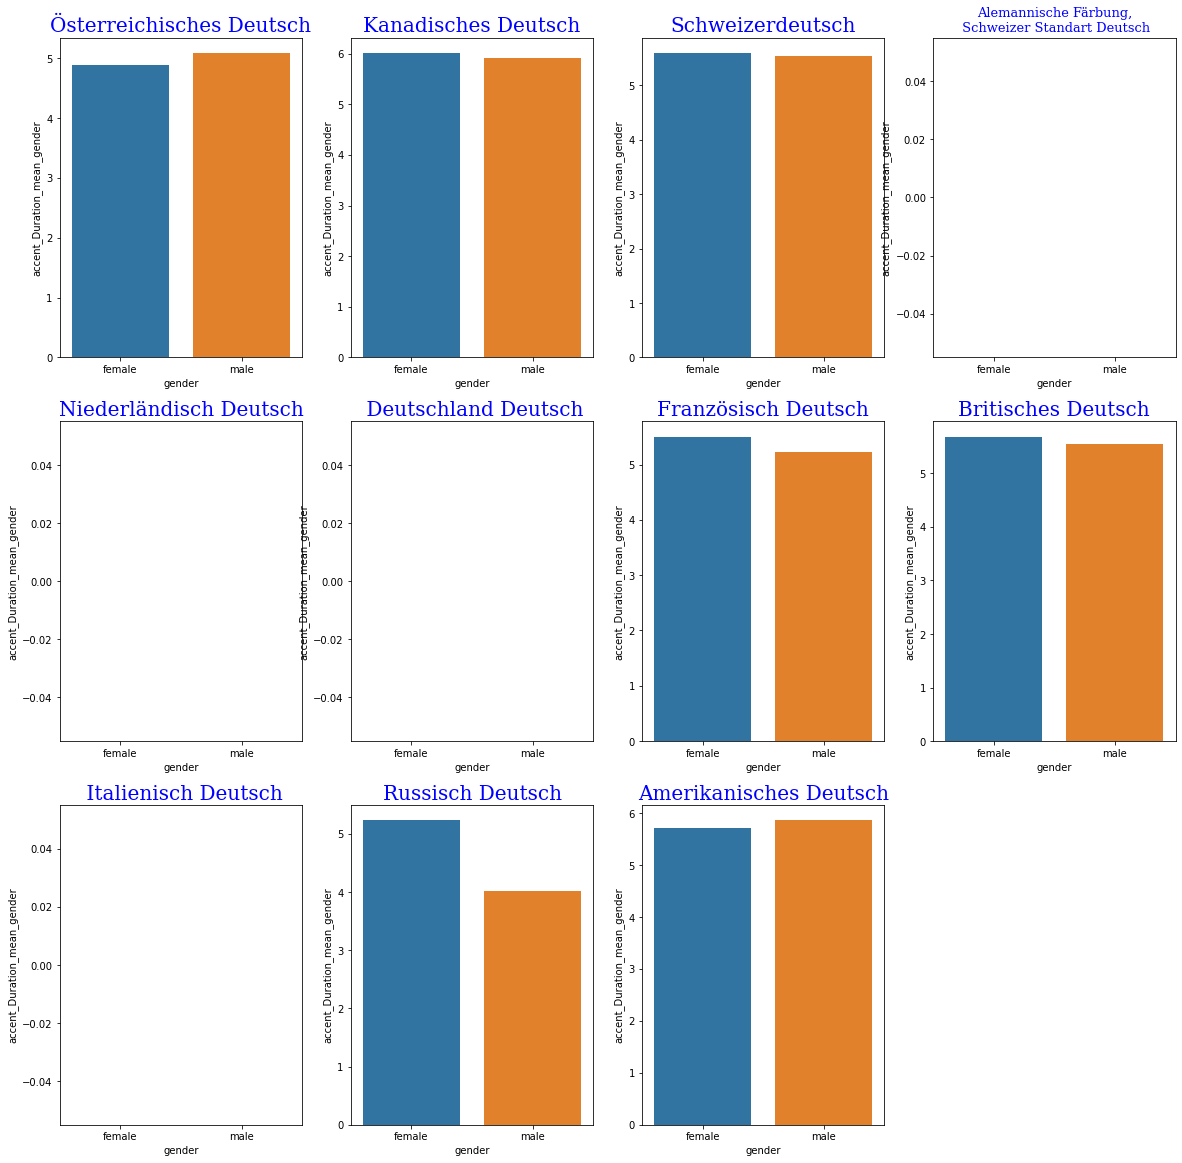

In [78]:
############################## Bar chart: x='accent', y = 'accent_Duration_mean' according to the gender - Accent ='all Accent'#######################################
print("################################## Bar chart: x='accent', y = 'accent_Duration_mean' according to the gender - Accent ='all Accent' ###########################################")
##### def plotBarChartsDurrationGenderAllAccent():
list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us']
list_dataset_test_accent=['Österreichisches Deutsch','Kanadisches Deutsch','Schweizerdeutsch','Alemannische Färbung,Schweizer Standart Deutsch','Niederländisch Deutsch',' Deutschland Deutsch',
                          'Französisch Deutsch','Britisches Deutsch',' Italienisch Deutsch'
,'Russisch Deutsch','Amerikanisches Deutsch']


# list_dataset_test_=['de_al']
# list_dataset_test_accent=['Alemannische Färbung,Schweizer Standart Deutsch']



# list_dataset_test_=['at']
# list_dataset_test_accent=['Österreichisches Deutsch']

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
  
data_2 = {'Accent_short':list_dataset_test_,'Accent_long': list_dataset_test_accent}
dataset_accent = pd.DataFrame(data_2)



 
############################# 1- reading the dataset ##########################################################



for i in range(0,len(dataset_accent)):

  dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t',low_memory=False)
  accent_short_var=dataset_accent['Accent_short'][i]
  accent_long_var=dataset_accent['Accent_long'][i]

  ##

  # dataset_accent=f'dataset_test_{i}'
  # textfile_name=f'test_{i}.txt'
  dataset_test_ca = pd.read_csv(f'test_{accent_short_var}.txt', header=None, names=['audio_filepath','text','duration'])
  

  # dataset_test_ca=f'dataset_test_{i}'
  # extract the numeric values of the durations from the third Column and store it in a new column called
  dataset_test_ca['duration_numeric'] = dataset_test_ca['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
  dataset_test_ca['duration_numeric'] =dataset_test_ca['duration_numeric'].div(10)
  # extract the numeric values of the durations from the third Column and store it in a new column called 
  #dataset_test_ca['audio_filepath_numeric'] = dataset_test_ca['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

  dataset_test_ca['audio_filepath_numeric'] = dataset_test_ca['audio_filepath'].str[-13:-5]
  


  # ############################# 2- extract the audio_filepath number and change them to integer################## 

  # get the audio file number and display it at dataset_validated_tsv['audio_filepath_numeric']
  dataset_validated_tsv['audio_filepath_numeric'] = dataset_validated_tsv['path'].str[-12:-4]
  dataset_validated_tsv['audio_filepath_numeric']=dataset_validated_tsv['audio_filepath_numeric'].astype('int')
  dataset_test_ca['audio_filepath_numeric']=dataset_test_ca['audio_filepath_numeric'].astype('int')
  
  
  ############################# 3- Drop all NaN gender and NaN Accent values, and show only the female gender and accent_long_var rows #############################
  dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['gender'] != 'female') | (dataset_validated_tsv['gender'].isna())| 
  (dataset_validated_tsv['accents'].isna())| (dataset_validated_tsv['accents']!=accent_long_var)].index, inplace=True)
  #dataset_validated_tsv
 
  ############################# 4- Merge using audio_filepath_numeric column ##################################
  ####################5-calculate the Mean of duration when the gender is female###########################
  dataset_test_ca_validated_tsv_female=pd.merge(dataset_test_ca,dataset_validated_tsv)
  dataset_test_ca_validated_tsv_female['gender']=dataset_test_ca_validated_tsv_female['gender'].astype("string")
  dataset_test_ca_validated_tsv_female
  dataset_test_ca_validated_tsv_female['accent_Duration_mean_gender']=np.mean(dataset_test_ca_validated_tsv_female['duration_numeric'])
  

  
  ############################# 6- reading the dataset ##########################################################
  ############################# 7- extract the audio_filepath number and change them to integer################## 
  # get the audio file number and display it at dataset_validated_tsv['audio_filepath_numeric']
  #dataset_test_ca = pd.read_csv(f'test_{accent_short_var}.txt', header=None, names=['audio_filepath','text','duration'])
  dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t',low_memory=False)
  dataset_validated_tsv['audio_filepath_numeric'] = dataset_validated_tsv['path'].str[-12:-4]
  dataset_validated_tsv['audio_filepath_numeric']=dataset_validated_tsv['audio_filepath_numeric'].astype('int')




  
  ############################# 8- Drop all NaN gender and NaN Accent values, and show only the male gender and accent_long_var rows #############################
  dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['gender'] != 'male') | (dataset_validated_tsv['gender'].isna())| (dataset_validated_tsv['accents'].isna())
  | (dataset_validated_tsv['accents']!=accent_long_var)].index, inplace=True)

  ############################# 9- Merge using audio_filepath_numeric column ##################################
  dataset_test_ca_validated_tsv_male=pd.merge(dataset_test_ca,dataset_validated_tsv)
  dataset_test_ca_validated_tsv_male['gender']=dataset_test_ca_validated_tsv_male['gender'].astype("string")

 



  #################### 10- calculate the Mean of duration when the gender is male###########################
  dataset_test_ca_validated_tsv_male['accent_Duration_mean_gender']=np.mean(dataset_test_ca_validated_tsv_male['duration_numeric'])
  #dataset_test_ca_validated_tsv_male
  ###### add/append the upper dataset dataset_test_ca_validated_tsv_female to the lower dataset dataset_test_ca_validated_tsv_male###########################
  ###### and call the result dataset_test_ca_validated_tsv_family

#########################################################################################################################################################################
########################################################### test if the dataframes are empty!##############################################################################
#########################################################################################################################################################################

  if not dataset_test_ca_validated_tsv_female.empty and not dataset_test_ca_validated_tsv_male.empty:
    dataset_test_ca_validated_tsv_family=dataset_test_ca_validated_tsv_female.append(dataset_test_ca_validated_tsv_male)
  elif dataset_test_ca_validated_tsv_female.empty and not dataset_test_ca_validated_tsv_male.empty:
    dataset_test_ca_validated_tsv_family=dataset_test_ca_validated_tsv_male
  elif dataset_test_ca_validated_tsv_male.empty and not dataset_test_ca_validated_tsv_female.empty:
    dataset_test_ca_validated_tsv_family=dataset_test_ca_validated_tsv_female
  else:
    data_3={'gender':['female','male'],'accent_Duration_mean_gender':[0,0]}
    dataset_test_ca_validated_tsv_family=pd.DataFrame(data_3)

    ################### 11- plot the dataset_test_ca_validated_tsv_family in Bar Chart #######################

  figure_duriation_distribution_accent=plt.figure(12,figsize=(20,20))  
  #plt.subplots(figure's number per column,figure's number per row)

  # Sup_plot_position=f'dataset_test_{i}'

  # Sup_plot_position=Sup_plot_position.astype(int)
  ax_duriation_distribution_accent_at=figure_duriation_distribution_accent.add_subplot(3,4,i+1)
  font1 = {'family':'serif','color':'blue','size':20}
  font2 = {'family':'serif','color':'darkred','size':15}
  if accent_long_var=='Alemannische Färbung,Schweizer Standart Deutsch':
    font1 = {'family':'serif','color':'blue','size':13}
    accent_long_var='Alemannische Färbung,\n Schweizer Standart Deutsch'
  
  plt.title(accent_long_var,fontdict  = font1)
  #ax.legend()
  #min([], default="EMPTY")
  ax = sns.barplot(x = 'gender', y = 'accent_Duration_mean_gender', data = dataset_test_ca_validated_tsv_family)

plt.savefig('plotBarDiagramsAccent_gender_.png')


####**<font color="1497d4">Bar chart: All Accent - Age</font>** **x='accent', y = 'accent_Duration_mean' according to age where Accent ='all Accent'**

################################## Bar chart: x='accent', y = 'accent_Duration_mean' according to the age - Accent ='all Accent' ###########################################


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


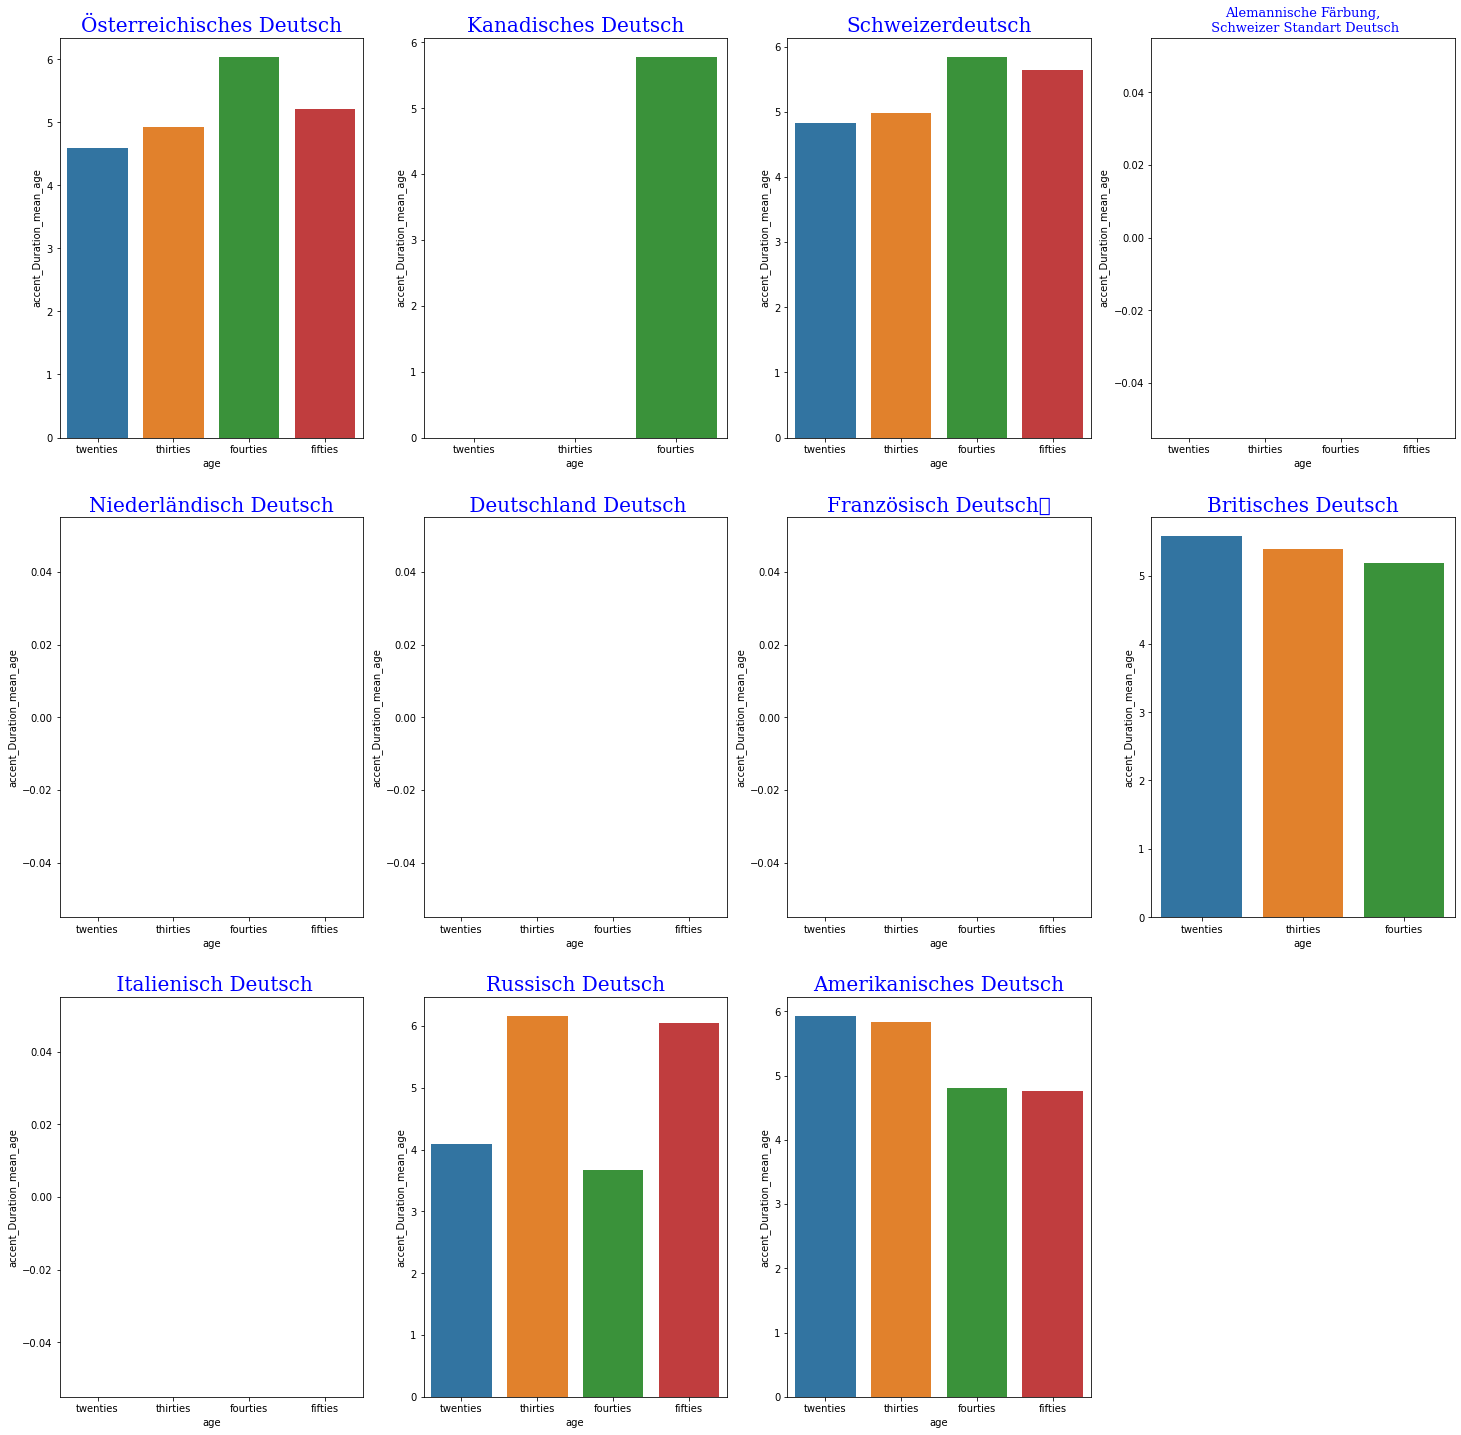

In [76]:
############################## Bar chart: x='accent', y = 'accent_Duration_mean' according to the age - Accent ='all Accent'#######################################
print("################################## Bar chart: x='accent', y = 'accent_Duration_mean' according to the age - Accent ='all Accent' ###########################################")
# def plotBarChartsDurrationageAllAccent():
list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us']
list_dataset_test_accent=['Österreichisches Deutsch','Kanadisches Deutsch','Schweizerdeutsch','Alemannische Färbung,Schweizer Standart Deutsch','Niederländisch Deutsch',' Deutschland Deutsch','Französisch Deutsch	','Britisches Deutsch',' Italienisch Deutsch'
,'Russisch Deutsch','Amerikanisches Deutsch']

# list_dataset_test_=['at']
# list_dataset_test_accent=['Österreichisches Deutsch']

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# four lists of iterations of twenties and thirties elements
list_twenties=list(map(lambda x:'twenties',list_dataset_test_))
list_thirties=list(map(lambda x:'thirties',list_dataset_test_))
list_fourties=list(map(lambda x:'fourties',list_dataset_test_))
list_fifties=list(map(lambda x:'fifties',list_dataset_test_))



data_1 = {'Accent_short': list_dataset_test_,
'Accent_long': list_dataset_test_accent,'twenties':list_twenties,'thirties':list_thirties,'fourties':list_fourties,'fifties':list_fifties  }
dataset_accent_age = pd.DataFrame(data_1)
############################# 1- reading the dataset ##########################################################



for i in range(0,len(dataset_accent_age)):
  

  accent_short_var=dataset_accent_age['Accent_short'][i]
  accent_long_var=dataset_accent_age['Accent_long'][i]
  age_var_twenties=dataset_accent_age['twenties'][i]
  age_var_thirties=dataset_accent_age['thirties'][i]
  age_var_fourties=dataset_accent_age['fourties'][i]
  age_var_fifties=dataset_accent_age['fifties'][i]

  ##

#########################################################################################################################################################################
########################################################### ages 20 - 30 ################################################################################################
#########################################################################################################################################################################
  # dataset_accent_age=f'dataset_test_{i}'
  # textfile_name=f'test_{i}.txt'
  dataset_test_ca = pd.read_csv(f'test_{accent_short_var}.txt', header=None, names=['audio_filepath','text','duration'])
  dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t',low_memory=False)
  
  # dataset_test_ca=f'dataset_test_{i}'
  # extract the numeric values of the durations from the third Column and store it in a new column called
  dataset_test_ca['duration_numeric'] = dataset_test_ca['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
  dataset_test_ca['duration_numeric'] =dataset_test_ca['duration_numeric'].div(10)
  # extract the numeric values of the durations from the third Column and store it in a new column called 
  #dataset_test_ca['audio_filepath_numeric'] = dataset_test_ca['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

  dataset_test_ca['audio_filepath_numeric'] = dataset_test_ca['audio_filepath'].str[-13:-5]



  # ############################# 2- extract the audio_filepath number and change them to integer################## 

  # get the audio file number and display it at dataset_validated_tsv['audio_filepath_numeric']
  dataset_validated_tsv['audio_filepath_numeric'] = dataset_validated_tsv['path'].str[-12:-4]
  dataset_validated_tsv['audio_filepath_numeric']=dataset_validated_tsv['audio_filepath_numeric'].astype('int')
  dataset_test_ca['audio_filepath_numeric']=dataset_test_ca['audio_filepath_numeric'].astype('int')

#########***********************************

  ############################ 3-A Drop all NaN age and NaN Accent values, and show only the twenties-->>age_var_twenties age and accent_long_var rows #############################
  dataset_validated_tsv.drop(dataset_validated_tsv[ (dataset_validated_tsv['age'].isna())| (dataset_validated_tsv['age'] != age_var_twenties)].index, inplace=True)


  ############################ 3-B Drop all NaN age and NaN Accent values, and show only the twenties-->>age_var_twenties age and accent_long_var rows #############################
  dataset_validated_tsv.drop(dataset_validated_tsv[ (dataset_validated_tsv['accents'].isna())| (dataset_validated_tsv['accents']!=accent_long_var)].index, inplace=True)
  

  

  ############################# 3- Drop all NaN age and NaN Accent values, and show only the twenties-->>age_var_twenties age and accent_long_var rows #############################
  # dataset_validated_tsv.drop(dataset_validated_tsv[ (dataset_validated_tsv['age'].isna())| (dataset_validated_tsv['age'] != age_var_twenties) |
  # (dataset_validated_tsv['accents'].isna())| (dataset_validated_tsv['accents']!=accent_long_var)].index, inplace=True)
  #dataset_validated_tsv



  ############################# 4- Merge using audio_filepath_numeric column ##################################
  ####################5-calculate the Mean of duration when the age is twenties###########################
  dataset_test_ca_validated_tsv_twenties=pd.merge(dataset_test_ca,dataset_validated_tsv)
  dataset_test_ca_validated_tsv_twenties['age']=dataset_test_ca_validated_tsv_twenties['age'].astype("string")
  dataset_test_ca_validated_tsv_twenties['accent_Duration_mean_age']=np.mean(dataset_test_ca_validated_tsv_twenties['duration_numeric'])


  # ############################ 6- reading the dataset to make the calculations of the age thirties #################
  # ############################ 7- extract the audio_filepath number and change them to integer  #################### 
  # get the audio file number and display it at dataset_validated_tsv['audio_filepath_numeric']
   
  dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t',low_memory=False)
  dataset_validated_tsv['audio_filepath_numeric'] = dataset_validated_tsv['path'].str[-12:-4]
  dataset_validated_tsv['audio_filepath_numeric']=dataset_validated_tsv['audio_filepath_numeric'].astype('int')

# print('##'*20,accent_long_var,'##'*60)
# print(dataset_validated_tsv)

  # ############################# 8-A Drop all NaN age and NaN Accent values, and show only the thirties -->>age_var_thirties age and accent_long_var rows #############################
  dataset_validated_tsv.drop(dataset_validated_tsv[ (dataset_validated_tsv['age'].isna())| (dataset_validated_tsv['age'] != age_var_thirties)].index, inplace=True)

############################ 8-B Drop all NaN age and NaN Accent values, and show only the twenties-->>age_var_thirties age and accent_long_var rows #############################
  dataset_validated_tsv.drop(dataset_validated_tsv[ (dataset_validated_tsv['accents'].isna())| (dataset_validated_tsv['accents']!=accent_long_var)].index, inplace=True)

# print('##'*20,accent_long_var,'##'*60)
# dataset_validated_tsv

 
  ############################# 9- Merge using audio_filepath_numeric column ##################################
  dataset_test_ca_validated_tsv_thirties=pd.merge(dataset_test_ca,dataset_validated_tsv)
  dataset_test_ca_validated_tsv_thirties['age']=dataset_test_ca_validated_tsv_thirties['age'].astype("string")


  #################### 10- calculate the Mean of duration when the age is thirties###########################
  dataset_test_ca_validated_tsv_thirties['accent_Duration_mean_age']=np.mean(dataset_test_ca_validated_tsv_thirties['duration_numeric'])
  #dataset_test_ca_validated_tsv_thirties
  ###### add/append the upper dataset dataset_test_ca_validated_tsv_twenties to the lower dataset dataset_test_ca_validated_tsv_thirties###########################
  ###### and call the result dataset_test_ca_validated_tsv_20_30
  ####>>>>>>>dataset_test_ca_validated_tsv_20_30=dataset_test_ca_validated_tsv_twenties.append(dataset_test_ca_validated_tsv_thirties)

#########################################################################################################################################################################
########################################################### test if the dataframes are empty!##############################################################################
#########################################################################################################################################################################

  if not dataset_test_ca_validated_tsv_twenties.empty and not dataset_test_ca_validated_tsv_thirties.empty:
    dataset_test_ca_validated_tsv_20_30=dataset_test_ca_validated_tsv_twenties.append(dataset_test_ca_validated_tsv_thirties)
  elif dataset_test_ca_validated_tsv_twenties.empty and not dataset_test_ca_validated_tsv_thirties.empty:
    dataset_test_ca_validated_tsv_20_30=dataset_test_ca_validated_tsv_thirties
  elif dataset_test_ca_validated_tsv_thirties.empty and not dataset_test_ca_validated_tsv_twenties.empty:
    dataset_test_ca_validated_tsv_20_30=dataset_test_ca_validated_tsv_twenties
  else:
    data_3={'age':['twenties','thirties'],'accent_Duration_mean_age':[0,0]}
    dataset_test_ca_validated_tsv_20_30=pd.DataFrame(data_3)


#########################################################################################################################################################################
########################################################### ages 40 - 50 ################################################################################################
#########################################################################################################################################################################



  dataset_test_ca = pd.read_csv(f'test_{accent_short_var}.txt', header=None, names=['audio_filepath','text','duration'])
  dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t',low_memory=False)
  

  # extract the numeric values of the durations from the third Column and store it in a new column called
  dataset_test_ca['duration_numeric'] = dataset_test_ca['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
  dataset_test_ca['duration_numeric'] =dataset_test_ca['duration_numeric'].div(10)
  # extract the numeric values of the durations from the third Column and store it in a new column called audio_filepath_numeric
  dataset_test_ca['audio_filepath_numeric'] = dataset_test_ca['audio_filepath'].str[-13:-5]



  # ############################# 2- extract the audio_filepath number and change them to integer################## 

  # get the audio file number and display it at dataset_validated_tsv['audio_filepath_numeric']
  dataset_validated_tsv['audio_filepath_numeric'] = dataset_validated_tsv['path'].str[-12:-4]
  dataset_validated_tsv['audio_filepath_numeric']=dataset_validated_tsv['audio_filepath_numeric'].astype('int')
  dataset_test_ca['audio_filepath_numeric']=dataset_test_ca['audio_filepath_numeric'].astype('int')


  ############################ 3-A Drop all NaN age and NaN Accent values, and show only the fourties-->>age_var_fourties age and accent_long_var rows #############################
  dataset_validated_tsv.drop(dataset_validated_tsv[ (dataset_validated_tsv['age'].isna())| (dataset_validated_tsv['age'] != age_var_fourties)].index, inplace=True)


  ############################ 3-B Drop all NaN age and NaN Accent values, and show only the fourties-->>age_var_fourties age and accent_long_var rows #############################
  dataset_validated_tsv.drop(dataset_validated_tsv[ (dataset_validated_tsv['accents'].isna())| (dataset_validated_tsv['accents']!=accent_long_var)].index, inplace=True)
  

  

  ############################# 3- Drop all NaN age and NaN Accent values, and show only the fourties-->>age_var_fourties age and accent_long_var rows #############################
  # dataset_validated_tsv.drop(dataset_validated_tsv[ (dataset_validated_tsv['age'].isna())| (dataset_validated_tsv['age'] != age_var_fourties) |
  # (dataset_validated_tsv['accents'].isna())| (dataset_validated_tsv['accents']!=accent_long_var)].index, inplace=True)
  #dataset_validated_tsv



  ############################# 4- Merge using audio_filepath_numeric column ##################################
  ####################5-calculate the Mean of duration when the age is fourties###########################
  dataset_test_ca_validated_tsv_fourties=pd.merge(dataset_test_ca,dataset_validated_tsv)
  dataset_test_ca_validated_tsv_fourties['age']=dataset_test_ca_validated_tsv_fourties['age'].astype("string")
  dataset_test_ca_validated_tsv_fourties['accent_Duration_mean_age']=np.mean(dataset_test_ca_validated_tsv_fourties['duration_numeric'])


  # ############################ 6- reading the dataset to make the calculations of the age fifties #################
  # ############################ 7- extract the audio_filepath number and change them to integer  #################### 
  # get the audio file number and display it at dataset_validated_tsv['audio_filepath_numeric']
  dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t',low_memory=False)
  dataset_validated_tsv['audio_filepath_numeric'] = dataset_validated_tsv['path'].str[-12:-4]
  dataset_validated_tsv['audio_filepath_numeric']=dataset_validated_tsv['audio_filepath_numeric'].astype('int')

# print('##'*20,accent_long_var,'##'*60)
# print(dataset_validated_tsv)

  # ############################# 8-A Drop all NaN age and NaN Accent values, and show only the fifties -->>age_var_fifties age and accent_long_var rows #############################
  dataset_validated_tsv.drop(dataset_validated_tsv[ (dataset_validated_tsv['age'].isna())| (dataset_validated_tsv['age'] != age_var_fifties)].index, inplace=True)

############################ 8-B Drop all NaN age and NaN Accent values, and show only the fourties-->>age_var_fifties age and accent_long_var rows #############################
  dataset_validated_tsv.drop(dataset_validated_tsv[ (dataset_validated_tsv['accents'].isna())| (dataset_validated_tsv['accents']!=accent_long_var)].index, inplace=True)

# print('##'*20,accent_long_var,'##'*60)
# dataset_validated_tsv

 
  ############################# 9- Merge using audio_filepath_numeric column ##################################
  dataset_test_ca_validated_tsv_fifties=pd.merge(dataset_test_ca,dataset_validated_tsv)
  dataset_test_ca_validated_tsv_fifties['age']=dataset_test_ca_validated_tsv_fifties['age'].astype("string")


  #################### 10- calculate the Mean of duration when the age is fifties###########################
  dataset_test_ca_validated_tsv_fifties['accent_Duration_mean_age']=np.mean(dataset_test_ca_validated_tsv_fifties['duration_numeric'])
  #dataset_test_ca_validated_tsv_fifties
  ###### add/append the upper dataset dataset_test_ca_validated_tsv_fourties to the lower dataset dataset_test_ca_validated_tsv_fifties###########################
  ###### and call the result dataset_test_ca_validated_tsv_40_50
  ####>>>>>>>dataset_test_ca_validated_tsv_40_50=dataset_test_ca_validated_tsv_fourties.append(dataset_test_ca_validated_tsv_fifties)

#########################################################################################################################################################################
########################################################### test if the dataframes are empty!##############################################################################
#########################################################################################################################################################################

  if not dataset_test_ca_validated_tsv_fourties.empty and not dataset_test_ca_validated_tsv_fifties.empty:
    dataset_test_ca_validated_tsv_40_50=dataset_test_ca_validated_tsv_fourties.append(dataset_test_ca_validated_tsv_fifties)
  elif dataset_test_ca_validated_tsv_fourties.empty and not dataset_test_ca_validated_tsv_fifties.empty:
    dataset_test_ca_validated_tsv_40_50=dataset_test_ca_validated_tsv_fifties
  elif dataset_test_ca_validated_tsv_fifties.empty and not dataset_test_ca_validated_tsv_fourties.empty:
    dataset_test_ca_validated_tsv_40_50=dataset_test_ca_validated_tsv_fourties
  else:
    data_3={'age':['fourties','fifties'],'accent_Duration_mean_age':[0,0]}
    dataset_test_ca_validated_tsv_40_50=pd.DataFrame(data_3)

#########################################################################################################################################################################
########################################################### merge all ages: 20-30 with 40 - 50 ########################################################################## 
#########################################################################################################################################################################
  ###>>>>>>>>dataset_test_ca_validated_tsv_all_ages=dataset_test_ca_validated_tsv_20_30.append(dataset_test_ca_validated_tsv_40_50)


#########################################################################################################################################################################
########################################################### test if the dataframes are empty!##############################################################################
#########################################################################################################################################################################

  if not dataset_test_ca_validated_tsv_20_30.empty and not dataset_test_ca_validated_tsv_40_50.empty:
    dataset_test_ca_validated_tsv_all_ages=dataset_test_ca_validated_tsv_20_30.append(dataset_test_ca_validated_tsv_40_50)
  elif dataset_test_ca_validated_tsv_20_30.empty and not dataset_test_ca_validated_tsv_40_50.empty:
    dataset_test_ca_validated_tsv_all_ages=dataset_test_ca_validated_tsv_40_50
  elif dataset_test_ca_validated_tsv_40_50.empty and not dataset_test_ca_validated_tsv_20_30.empty:
    dataset_test_ca_validated_tsv_all_ages=dataset_test_ca_validated_tsv_20_30
  else:
    data_3={'age':['fourties','fifties'],'accent_Duration_mean_age':[0,0]}
    dataset_test_ca_validated_tsv_all_ages=pd.DataFrame(data_3)



  ################### 11- plot the dataset_test_ca_validated_tsv_family in Bar Chart #######################

  figure_duriation_distribution_accent=plt.figure(12,figsize=(25,25))  
  #plt.subplots(figure's number per column,figure's number per row)

  # Sup_plot_position=f'dataset_test_{i}'

  # Sup_plot_position=Sup_plot_position.astype(int)
  ax_duriation_distribution_accent_at=figure_duriation_distribution_accent.add_subplot(3,4,i+1)
  font1 = {'family':'serif','color':'blue','size':20}
  font2 = {'family':'serif','color':'darkred','size':15}
  if accent_long_var=='Alemannische Färbung,Schweizer Standart Deutsch':
    font1 = {'family':'serif','color':'blue','size':13}
    accent_long_var='Alemannische Färbung,\n Schweizer Standart Deutsch'
  plt.title(accent_long_var,fontdict  = font1)
  #ax.legend()
  ax = sns.barplot(x = 'age', y = 'accent_Duration_mean_age', data = dataset_test_ca_validated_tsv_all_ages)
plt.savefig('plotBarDiagramsAccent_age.png')




###**<font color="1497d4">Bar charts Word Error Rate's Accent  </font>**


####**<font color="1497d4">Bar chart: </font>** **x='accent', y = 'accent_Duration_mean' according to Word Error Rate Accent ='all Accent'**



####**<font color="1497d4">Bar chart: </font>** **x='accent', y = 'accent_Duration_mean'**

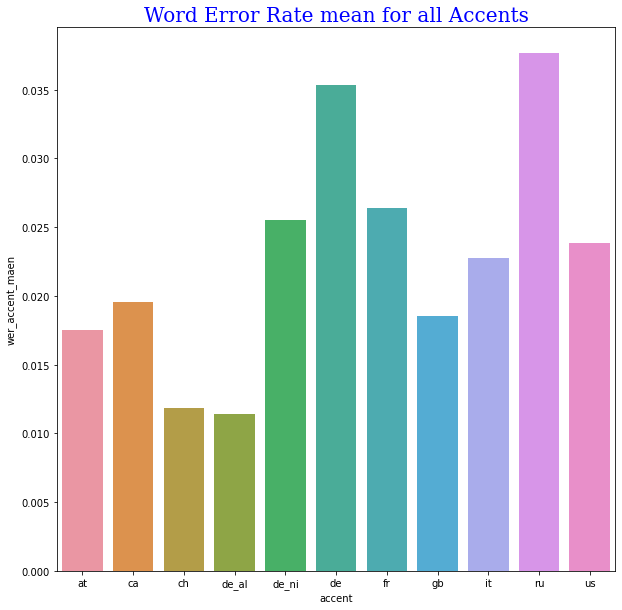

In [415]:
####################################################################################################
####################Bar chart: x='accent', y = 'accent_Duration_mean' according to Word Error Rate Accent ='all Accent'##########################
####################################################################################################


# list_dataset_test_=['at','ca']
list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us','stop']
dataset_test_=pd.DataFrame(list_dataset_test_, columns=['accent'])
###########################################################################

# list_dataset_test_accent=['Österreichisches Deutsch','Kanadisches Deutsch']
list_dataset_test_accent=['Österreichisches Deutsch','Kanadisches Deutsch','Schweizerdeutsch','Alemannische Färbung,Schweizer Standart Deutsch','Niederländisch Deutsch',' Deutschland Deutsch','Französisch Deutsch	','Britisches Deutsch',' Italienisch Deutsch'
,'Russisch Deutsch','Amerikanisches Deutsch']
###########################################################################

# list_dataset_results_json=['test_at.txt','test_gb.txt']
list_dataset_results_json={'test_accent_txt':['test_at.txt','test_gb.txt','test_it.txt','test_de_al.txt','test_fr.txt','test_de_ni.txt','test_ch.txt',
               'test_de.txt','test_us.txt','test_ca.txt','test_ru.txt']}
dataset_results_json_accent=pd.DataFrame(list_dataset_results_json,columns=['test_accent_txt'])
##############################################################################################################

list_accent_all_wer_mean_result=[]
dataset_accent_all_wer_mean_result=pd.DataFrame(list_accent_all_wer_mean_result,columns=['accent','wer_accent_maen'])
##############################################################################################################


for i in range(len(dataset_results_json_accent)):
  dataset_results_json = pd.read_json('results.json')
  #################################Extract and calculate the wer_accent_numeric########################################
  # print(dataset_results_json_accent[i])
  # print(f' ******{i}\n')
  dataset_results_json.drop(dataset_results_json[ (dataset_results_json[dataset_results_json_accent.test_accent_txt[i]].isna())].index, inplace=True)
   # dataset_results_json.drop(dataset_results_json[ (dataset_results_json['test_at.txt'].isna())| (dataset_results_json['age'] != age_var_fifties)].index, inplace=True)
  # print(f'************{dataset_results_json}*******\n')
   
  # print(f'***********************************************\n')
  
  ###################################################################################################
  ###################Convert Json Index to column contents in dataframe #############################
  ###################################################################################################


  # extract the numeric values of the WER durations from the accent Column and store it in a new column called wer_accent_numeric
  AA=dataset_test_.accent[i]
  dataset_results_json['wer_accent_numeric'] = dataset_results_json[dataset_results_json_accent.test_accent_txt[i]].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
  dataset_results_json['wer_accent_numeric'] =dataset_results_json['wer_accent_numeric'].div(10**17)
  # dataset_results_json['wer_accent_numeric']=dataset_results_json.round({'wer_accent_numeric':3)

  # # extract the numeric values of the durations from the third Column and store it in a new column called 
    
   
  #### calculate the mean of the accent 
  wer_accent_maen_var=round(dataset_results_json.mean(axis=0, skipna=None, level=None, numeric_only=True),7)
  wer_accent_maen_var=wer_accent_maen_var.to_string()
  # print(wer_accent_maen_var[0])
  # print(f'{AA}')

  # print(type(wer_accent_maen_var))
  dataset_results_json['wer_accent_maen'] = np.where(dataset_results_json['wer_accent_numeric']!=np.NaN,wer_accent_maen_var[22:32], '000')

  ## prepare the last DataFrame which contains of 2 coulmns accent and wer_accent_maen

      # df = df.append({'a': 1, 'b': 2}, ignore_index=True)
  dataset_accent_all_wer_mean_result = dataset_accent_all_wer_mean_result.append({'accent': f'{AA}', 'wer_accent_maen': f'{wer_accent_maen_var[22:32]}'}, ignore_index=True)
  dataset_accent_all_wer_mean_result['wer_accent_maen']=dataset_accent_all_wer_mean_result['wer_accent_maen'].astype(float)

  # dataset_accent_all_wer_mean_result['wer_accent_maen'] = np.where(dataset_test_['accent']!=np.NaN,wer_accent_maen_var[22:32], '000')

  # print('*'*60,AA)
  # print(dataset_accent_all_wer_mean_result)


################################## Accent AT ###########################################
# position of the figure and figure's size 
figure_duriation_distribution_accent=plt.figure(12,figsize=(10,10))  
#plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_at=figure_duriation_distribution_accent.add_subplot(3,4,i+1)


# plt.xlabel("Speaker's accent - Austria")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_results_json['accent_Duration_mean'],dataset_results_json['audio_filepath_numeric'], lw=3, ms=20)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
if accent_long_var=='Alemannische Färbung,Schweizer Standart Deutsch':
  font1 = {'family':'serif','color':'blue','size':13}
  accent_long_var='Alemannische Färbung,\n Schweizer Standart Deutsch'
  

plt.title('Word Error Rate mean for all Accents',fontdict  = font1)


ax = sns.barplot(x = 'accent', y = 'wer_accent_maen', data = dataset_accent_all_wer_mean_result)
plt.savefig('plotBarDiagrams_Accent_WER.png')


In [404]:
type(dataset_accent_all_wer_mean_result)

pandas.core.frame.DataFrame

In [361]:
dataset_accent_all_wer_mean_result

,accent,wer_accent_maen
0,NaN,0.0195331
1,NaN,0.0195331


In [387]:
wer_accent_maen_var


'wer_accent_numeric    0.019533'

In [391]:
wer_accent_maen_var[22:32]

'0.019533'

In [380]:
qqq=dataset_results_json.mean(axis=None, skipna=None, level=None, numeric_only=True)


In [381]:
qqq[0]

0.019533124533124523

In [382]:
type(qqq)

pandas.core.series.Series

In [383]:
sss = qqq.to_string()



In [384]:
type(sss)

str

In [385]:
sss

'wer_accent_numeric    0.019533'

In [ ]:
dataset_validated_tsv_aaa.agg('mean')['duration_numeric'][0]

In [ ]:
import os
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/plotBarDiagramsAccentGender_script.py   /content/plotBarDiagramsAccentGender_script.py
# read the script
Read_dataset_file=open("plotBarDiagramsAccentGender_script.py",'r')
print(Read_dataset_file.read())
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/plotBarDiagramsAccentGender_script.py   /content/plotBarDiagramsAccentGender_script.py
# implement the script
exec(open("plotBarDiagramsAccentGender_script.py").read())

In [265]:
dataset_results_json

,test_at.txt,test_gb.txt,test_it.txt,test_de_al.txt,test_fr.txt,test_de_ni.txt,test_ch.txt,test_de.txt,test_us.txt,test_ca.txt,test_ru.txt,wer_accent_numeric,wer_accent_maen
/ds/audio/CommonVoiceCorpus10.0//cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_18597258.mp3,NaN,{'reference': 'alter falter das hat mir gerade...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250000e-15,0.019533124533124523
/ds/audio/CommonVoiceCorpus10.0//cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_18597260.mp3,NaN,{'reference': 'und so geht es im gänsemarsch b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.222222e-01,0.019533124533124523
/ds/audio/CommonVoiceCorpus10.0//cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_22265116.mp3,NaN,"{'reference': 'ja', 'hypothesis': 'ja', 'wer':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.019533124533124523
/ds/audio/CommonVoiceCorpus10.0//cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_22265120.mp3,NaN,"{'reference': 'drei', 'hypothesis': 'drei', 'w...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.019533124533124523
/ds/audio/CommonVoiceCorpus10.0//cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_22265123.mp3,NaN,"{'reference': 'zwei', 'hypothesis': 'zwei', 'w...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.019533124533124523
...,...,...,...,...,...,...,...,...,...,...,...,...,...
/ds/audio/CommonVoiceCorpus10.0//cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_23364671.mp3,NaN,{'reference': 'wir begrüßen sie von ganzem her...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.019533124533124523
/ds/audio/CommonVoiceCorpus10.0//cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_23364677.mp3,NaN,{'reference': 'der bachelor muss in keinem bes...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.019533124533124523
/ds/audio/CommonVoiceCorpus10.0//cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_23364678.mp3,NaN,{'reference': 'zusätzlich war zum bremsen eine...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.857143e-01,0.019533124533124523
/ds/audio/CommonVoiceCorpus10.0//cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_23364680.mp3,NaN,{'reference': 'sie sind formal den kurzgeschic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.019533124533124523


In [263]:
dataset_results_json['wer_accent_numeric'][7]

4e-17

In [259]:
dataset_results_json['wer_accent_numeric'][1]

0.222222222222222

####**<font color="1497d4">Bar chart: </font>** **x='accent', y = 'wer_Duration_mean'** **Accent ='Kanadisches Deutsch'**


####**<font color="1497d4">Bar chart: Word Error Rate - All Accent -Gender</font>** **x='accent', y = 'wer_Duration_mean' according to gender Accent ='all Accent'**

In [ ]:
####################################################################################################
####################Bar chart: x='accent', y = 'accent_Duration_mean' according to Word Error Rate Accent ='all Accent'##########################
####################################################################################################
list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us','stop']
list_dataset_test_accent=['Österreichisches Deutsch','Kanadisches Deutsch','Schweizerdeutsch','Alemannische Färbung,Schweizer Standart Deutsch','Niederländisch Deutsch',' Deutschland Deutsch','Französisch Deutsch	','Britisches Deutsch',' Italienisch Deutsch'
,'Russisch Deutsch','Amerikanisches Deutsch']
list_dataset_results_json={'test_accent_txt':['test_at.txt','test_gb.txt','test_it.txt','test_de_al.txt','test_fr.txt','test_de_ni.txt','test_ch.txt',
               'test_de.txt','test_us.txt','test_ca.txt','test_ru.txt']}

#################################Extract and calculate the wer_test_at.txt_numeric########################################
# add Columns Names to the Dataset: header=None, names=['audio_filepath','text','duration']
dataset_results_json = pd.read_json('results.json')

dataset_results_json.drop(dataset_results_json[ (dataset_results_json['test_at.txt'].isna())].index, inplace=True)
# dataset_results_json.drop(dataset_results_json[ (dataset_results_json['test_at.txt'].isna())| (dataset_results_json['age'] != age_var_fifties)].index, inplace=True)



####################################################################################################
####################Convert Json Index to column cone=tents in dataframe ##########################
####################################################################################################
# data_1 = {'Accent_short': list_dataset_test_,
# 'Accent_long': list_dataset_test_accent,'twenties':list_twenties,'thirties':list_thirties,'fourties':list_fourties,'fifties':list_fifties  }
# dataset_accent_age = pd.DataFrame(data_1)

list_wer_filepath=[]
for i in range(len(dataset_results_json)):
  #print(f'dataset_results_json[\'test_at.txt\'].index[{i}]= \n ',dataset_results_json['test_at.txt'].index[i])
  # print()

  # list_wer_filepath=dataset_results_json['test_at.txt'].index[i]
  list_wer_filepath.insert(i,dataset_results_json['test_at.txt'].index[i])
# print('*'*61,'list_wer_filepath')
# print(list_wer_filepath)
# print('*'*61,'list_wer_filepath')
wer_filepath_var={'audio_filepath':list_wer_filepath}
# print(wer_filepath_var)
dataset_wer_filepath=pd.DataFrame(wer_filepath_var)#
#####################################################################################################################
###### copy the audio_filepath (the json file index) to a new column in dataset_results_json called audio_filepath###
#####################################################################################################################
dataset_results_json['audio_filepath'] = np.where(wer_filepath_var['audio_filepath']!=np.NaN,dataset_wer_filepath, '000')
# extract 
dataset_results_json['audio_filepath_numeric'] = dataset_results_json['audio_filepath'].str[-12:-4]
 



 
# extract the numeric values of the WER durations from the test_at.txt Column and store it in a new column called wer_test_at.txt_numeric
dataset_results_json['wer_test_at.txt_numeric'] = dataset_results_json['test_at.txt'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_results_json['wer_test_at.txt_numeric'] =dataset_results_json['wer_test_at.txt_numeric'].div(10**17)
# # extract the numeric values of the durations from the third Column and store it in a new column called 
  
dataset_results_json 
#### calculate the mean of the test_at.txt 
dataset_results_json['audio_filepath'] = np.where(wer_filepath_var['audio_filepath']!=np.NaN,dataset_wer_filepath, '000')


# dataset_accent_all_Duration_mean_result['accent']=dataset_dataset_test_['accent']



# ################################## Accent AT ###########################################
# # position of the figure and figure;s size 
# figure_duriation_distribution_accent=plt.figure(12,figsize=(10,10))  
# #plt.subplots(figure's number per column,figure's number per row)
# ####>>>>>ax_duriation_distribution_accent_at=figure_duriation_distribution_accent.add_subplot(3,4,1)

# # for i in range(len(dataset_accent_all_Duration_mean_result)):
# dataset_test_at['accent_Duration_mean'] = np.where(dataset_test_at['audio_filepath']!=np.NaN,5.127319, '000')

# # plt.xlabel("Speaker's accent - Austria")
# # plt.ylabel("Duriation Distribution of Audiofiles")
# # plt.plot(dataset_test_at['accent_Duration_mean'],dataset_test_at['audio_filepath_numeric'], lw=3, ms=20)
# font1 = {'family':'serif','color':'blue','size':20}
# font2 = {'family':'serif','color':'darkred','size':15}

# plt.title('Word Error Rate mean for all Accents',fontdict  = font1)


# ax = sns.barplot(x = 'accent', y = 'accent_Duration_mean', data = dataset_accent_all_Duration_mean_result)
# plt.savefig('plotBarDiagrams_Accent_Duration.png')


####**<font color="1497d4">Bar chart: Word Error Rate - All Accent - Age</font>** **x='accent', y = 'wer_Duration_mean' according to age where Accent ='all Accent'**

In [ ]:
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/results.json   /content/results.json

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
  
dataset_results_json = pd.read_json('results.json')
# dataset_results_json = pd.read_json('results.json',  columns=['audio_filepath_numeric','test_at.txt','	test_gb.txt','	test_it.txt','	test_de_al.txt','	test_fr.txt','	test_de_ni.txt','	test_ch.txt','	test_de.txt','	test_us.txt','	test_ca.txt','	test_ru.txt'])
dataset_results_json
dataset_results_json.drop(dataset_results_json[ (dataset_results_json['test_at.txt'].isna())].index, inplace=True)
dataset_results_json

print('*******************print Labels************************')

for label, content in dataset_results_json.items():
    print(f'label: {label}')
    #print(f'content: {content}', sep='\n')

print('*********************print Contents**********************')

for label, content in dataset_results_json.items():
    #print(f'label: {label}')
    print(f'content: {content}', sep='\n')

In [ ]:
dataset_results_json['test_at.txt']

In [92]:
dataset_results_json = pd.read_json('results.json')

dataset_results_json.drop(dataset_results_json[ (dataset_results_json['test_at.txt'].isna())].index, inplace=True)
dataset_results_json['test_at.txt'] = dataset_results_json['test_at.txt'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_results_json['test_at.txt'] =dataset_results_json['test_at.txt'].div(10)
# dataset_results_json['test_at.txt'] = dataset_results_json['test_at.txt'].str[-12:-4]
# dataset_results_json['test_at.txt']=dataset_results_json['test_at.txt'].astype('int')
dataset_results_json['test_at.txt'].index[0]

'/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_31449916.mp3'

In [93]:
dataset_results_json['test_at.txt'][0]

2727272727272720.5

In [94]:
dataset_results_json['test_at.txt'].index[0]

'/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_31449916.mp3'

#Bar Charts Operations

In [160]:
dataset_results_json = pd.read_json('results.json')
dataset_results_json.drop(dataset_results_json[ (dataset_results_json['test_at.txt'].isna())].index, inplace=True)
dataset_results_json.count()

test_at.txt       4495
test_gb.txt          0
test_it.txt          0
test_de_al.txt       0
test_fr.txt          0
test_de_ni.txt       0
test_ch.txt          0
test_de.txt          0
test_us.txt          0
test_ca.txt          0
test_ru.txt          0
dtype: int64

In [168]:
####################################################################################################
####################Convert Json Index to column cone=tents in dataframe ##########################
####################################################################################################
# data_1 = {'Accent_short': list_dataset_test_,
# 'Accent_long': list_dataset_test_accent,'twenties':list_twenties,'thirties':list_thirties,'fourties':list_fourties,'fifties':list_fifties  }
# dataset_accent_age = pd.DataFrame(data_1)

list_wer_filepath=[]
for i in range(len(dataset_results_json)):
  #print(f'dataset_results_json[\'test_at.txt\'].index[{i}]= \n ',dataset_results_json['test_at.txt'].index[i])
  # print()

  # list_wer_filepath=dataset_results_json['test_at.txt'].index[i]
  list_wer_filepath.insert(i,dataset_results_json['test_at.txt'].index[i])
# print('*'*61,'list_wer_filepath')
# print(list_wer_filepath)
# print('*'*61,'list_wer_filepath')
wer_filepath_var={'audio_filepath':list_wer_filepath}
# print(wer_filepath_var)
dataset_wer_filepath=pd.DataFrame(wer_filepath_var)#
#####################################################################################################################
###### copy the audio_filepath (the json file index) to a new column in dataset_results_json called audio_filepath###
#####################################################################################################################
dataset_results_json['audio_filepath'] = np.where(wer_filepath_var['audio_filepath']!=np.NaN,dataset_wer_filepath, '000')
# extract 
dataset_results_json['audio_filepath_numeric'] = dataset_results_json['audio_filepath'].str[-12:-4]
# dataset_results_json['audio_filepath_numeric']
# a.str[-12:-4].astype('str')
# dataset_results_json['audio_filepath']
# dataset_results_json['audio_filepath_numeric'] = dataset_wer_filepath['audio_filepath'].str[-13:-5]
# dataset_results_json
dataset_results_json

,test_at.txt,test_gb.txt,test_it.txt,test_de_al.txt,test_fr.txt,test_de_ni.txt,test_ch.txt,test_de.txt,test_us.txt,test_ca.txt,test_ru.txt,audio_filepath,audio_filepath_numeric
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_31449916.mp3,{'reference': 'er ist nach eustache de saint p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...,31449916
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_19730674.mp3,{'reference': 'eine erste kleinformatige vorst...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...,19730674
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_19703888.mp3,{'reference': 'er blieb ohne erfolg und lag in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...,19703888
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_18507972.mp3,{'reference': 'mein garten ist teil eines klei...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...,18507972
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_24131267.mp3,{'reference': 'was habe ich damals für einen u...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...,24131267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_23706817.mp3,{'reference': 'es handelt sich heute um eine w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...,23706817
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_21599214.mp3,{'reference': 'wir müssen sie bloß verbessern ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...,21599214
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_25132532.mp3,{'reference': 'unter abspaltung von wasser bil...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...,25132532
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_23778312.mp3,{'reference': 'die sammlung wurde von großherz...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...,23778312


In [153]:
type(wer_filepath_var)

dict

In [155]:
type(dataset_wer_filepath)

pandas.core.frame.DataFrame

In [165]:
dataset_wer_filepath

,audio_filepath
0,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...
1,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...
2,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...
3,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...
4,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...
...,...
4490,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...
4491,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...
4492,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...
4493,/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0...


In [ ]:

# write a column from the validate.tsv to dataset_validated_tsv_accent.py
import os
# remove the script if exists 
# os.remove("dataset_accent.py")
# open script to write in the calculation of Mean of all accent
dataset_accent_write_file = open("dataset_validated_tsv_accent_age222.py",'w')
for i in (dataset_validated_tsv['age']):
  dataset_accent_write_file.write(f"\n'{i}'")
dataset_accent_write_file.close() 

In [ ]:
# write a column from the validate.tsv to dataset_validated_tsv_accent_age.py
import os
# remove the script if exists 
# os.remove("dataset_accent.py")
# open script to write in the calculation of Mean of all accent
dataset_accent_write_file = open("dataset_validated_tsv_accent_age111.py",'w')
# for i,j in dataset_test_at_validated_tsv_female.item():
#   dataset_accent_write_file.write(f"\n'{j}'")
# dataset_accent_write_file.close() 

for label, content in dataset_test_at_validated_tsv_female.items():
  dataset_accent_write_file.write(f"\n'{dataset_test_at_validated_tsv_female['accents']}'")
  print(f'label: {label}')
   #print(f'content: {content}', sep='\n')




In [ ]:
dataset_test_at_validated_tsv_female.groupby(['accents','gender'])
dataset_test_at_validated_tsv_female

In [ ]:
dataset_test_at_validated_tsv_female.agg('mean')

In [ ]:
dataset_validated_tsv_aaa.agg('mean')['duration_numeric'][0]

In [ ]:
import os
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/plotBarDiagramsAccentGender_script.py   /content/plotBarDiagramsAccentGender_script.py
# read the script
Read_dataset_file=open("plotBarDiagramsAccentGender_script.py",'r')
print(Read_dataset_file.read())
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/plotBarDiagramsAccentGender_script.py   /content/plotBarDiagramsAccentGender_script.py
# implement the script
exec(open("plotBarDiagramsAccentGender_script.py").read())

#### **Duration distribution of audiofiles per speaker's gender. both as a plot and in terms of mean and variance.**

# write to python file 

In [ ]:

# write the column contents from the validate.tsv to dataset_validated_tsv_accent.py
import os
# remove the script if exists 
# os.remove("dataset_accent.py")
# open script to write in the calculation of Mean of all accent
dataset_accent_write_file = open("dataset_validated_tsv_accent.py",'w')
for i in (dataset_validated_tsv['accents']):
  dataset_accent_write_file.write(f"\n'{i}'")
dataset_accent_write_file.close() 



In [ ]:
# write a label of dataset from the validate.tsv to dataset_validated_tsv_accent_age.py
import os
# remove the script if exists 
# os.remove("dataset_accent.py")
# open script to write in the calculation of Mean of all accent
dataset_accent_write_file = open("dataset_validated_tsv_accent_age.py",'w')
for i in (dataset_test_at_validated_tsv_female):
  dataset_accent_write_file.write(f"\n'{i}'")
dataset_accent_write_file.close() 

## <font color="1497d4">  **Running a Basic Emformer Training**</font>

 


## <font color="1497d4">  **Accented Speech Recognition - Speech Repo**</font>

<font color=white> **speech recognition @ voize**</font> 

## <font color="1497d4">  **Development Workflow**</font>
 
<font color=white> **Setup dev environment:**</font> 


 



## <font color="1497d4">  **Running a Basic Emformer Training**</font>

 


## <font color="1497d4">  **Accented Speech Recognition - Speech Repo**</font>

<font color=white> **speech recognition @ voize**</font> 

## <font color="1497d4">  **Development Workflow**</font>
 
<font color=white> **Setup dev environment:**</font> 


 

##Training efficiency

Measured on common-voice-de 6.1 (based on commit bff9e3f9afcb3893451f4d52ecf811f32c8ff59d):



Measured on common-voice-de 6.1 concatenated with multilingual-librispeech-de (some data dropped):



 ## Statistical Analysis for Accented Speech recognition
 ## Mozilla Common Voice 10.0. dataset download 
 

